# Word Count Analysis

In [1]:
#import libraries
import pandas as pd
from collections import Counter
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import altair as alt
import math

In [2]:
#import dataframes
df_cty = pd.read_csv('df_cty_final.csv',converters={'words':eval})
df_rb = pd.read_csv('df_rb_final.csv',converters={'words':eval})
df_rock = pd.read_csv('df_rock_final.csv',converters={'words':eval})

### Functions

In [3]:
def remove_num(text):
    '''
    function returns text with numbers removed
    parameter:
        text-->str
    '''
    for word in text:
        try:
            int(word)
            text.remove(word)
        except:
            pass
    return text

In [4]:
def word_count(word_list):
    '''
    function returns dataframe with word count information
    parameter:
        word_list-->list of word lists for each song in dataframe
    '''
    word_counts = Counter() #number of times a word appears in all songs
    
    for l in word_list:
        word_counts.update(l) #update word counts
    
    #create new dataframe
    df = pd.DataFrame(data={'word':word_counts.keys(),
                            'count':word_counts.values()})
    df['count_pct'] = df['count'].apply(lambda x: x/df['count'].sum()) #percent total (based on total word count)
    
    return df.sort_values(by='count',ascending=False).reset_index(drop=True)

In [12]:
def calc_tf_idf(song_list):
    '''
    function returns dataframe with tf-idf values for song list
    parameter:
        song_list-->list of lists of words in each song
            *['words'] column in genre dataframe
    '''
    #initiate variables
    corpus = set([word for song in song_list for word in song]) #set of all words in dataframe
    tf_list = [] #variable to hold dict of word counts for each song (for TF)
    total_appear = Counter() #counts for # of docs in which word appears (for IDF)
    N = len(song_list) #number of docs (for IDF)
    tf_idf_list = [] #variable to hold combined TF-IDF values
    
    #CALCULATE TERM FREQUENCY
    for song in song_list: #create dict with tf for each song
        total_appear.update(set(song)) #update for IDF analysis (below)
        d = dict.fromkeys(corpus,0)
        for word in song:
            d[word]+=1 #update word count
        d = {k:v/len(song) for k,v in d.items()} #normalize word counts
        tf_list.append(d) #add dictionary to dict_list
    
    #CALCULATE INVERSE DOCUMENT FREQUENCY
    total_appear = {k:total_appear[k] for k in corpus} #reorder dict to align with corpus
    idf = {k:math.log10(N/(v+1)) for k,v in total_appear.items()}
    
    #COMBINE
    for song in tf_list:
        tf_idf_dict = {k:v*idf[k] for k,v in song.items()}
        tf_idf_list.append(tf_idf_dict)
        
    #create dataframe with tf-idf values
    df=pd.DataFrame(tf_idf_list)
    
    return df.reset_index(drop=True)

In [6]:
def word_freq_df(df):
    """
    function returns sorted dataframe with word frequencies
    parameter:
        df-->dataframe with tf-idf values
    """
    new_df = pd.DataFrame({'weight':df.sum()})
    return new_df.sort_values(by='weight',ascending=False).reset_index().rename(columns={'index':'word'})

### Create Dataframes with Word Counts

In [7]:
#remove numbers from dataframes
df_cty['words'] = df_cty['words'].apply(remove_num) #country
df_rb['words'] = df_rb['words'].apply(remove_num) #R&B/hip-hop
df_rock['words'] = df_rock['words'].apply(remove_num) #rock/alternative

In [8]:
#word count dataframes
df_cty_word = word_count(df_cty['words']) #country
df_rb_word = word_count(df_rb['words']) #R&B/hip-hop
df_rock_word = word_count(df_rock['words']) #rock/alternative

In [10]:
df_rb_word.loc[10,'word']='n-word' #replace racial slur

In [ ]:
#preview country df
df_cty_word.head()

In [ ]:
#preview R&B/hip-hop df
df_rb_word.head()

In [ ]:
#preview rock/alternative df
df_rock_word.head()

In [ ]:
#write to file
df_cty_word.to_csv('df_cty_word_counts.csv') #country
df_rb_word.to_csv('df_rb_word_counts.csv') #R&B/hip-hop
df_rock_word.to_csv('df_rock_word_counts.csv') #rock/alternative

### Create Dataframes with Word Frequencies (TF-IDF)

In [13]:
#calculate tf-idf values
df_cty_tf = calc_tf_idf(df_cty['words']) #country
df_rb_tf = calc_tf_idf(df_rb['words']) #R&B/hip-hop
df_rock_tf = calc_tf_idf(df_rock['words']) #rock/alternative

In [14]:
#word frequency dataframes
df_cty_freq = word_freq_df(df_cty_tf) #country
df_rb_freq = word_freq_df(df_rb_tf) #R&B/hip-hop
df_rock_freq = word_freq_df(df_rock_tf) #rock/alternative

In [16]:
df_rb_freq.loc[3,'word']='n-word' #replace racial slur

In [ ]:
#preview country df
df_cty_freq.head()

In [ ]:
#preview R&B/hip-hop df
df_rb_freq.head()

In [ ]:
#preview rock/alternative df
df_rock_freq.head()

In [ ]:
#write to file
df_cty_freq.to_csv('df_cty_tfidf_values.csv') #country
df_rb_freq.to_csv('df_rb_tfidf_values.csv') #R&B/hip-hop
df_rock_freq.to_csv('df_rock_tfidf_values.csv') #rock/alternative

### Generate Word Clouds Using TF-IDF Values

In [18]:
#initialize word cloud generator
wc = WordCloud(max_words=100,background_color='white')

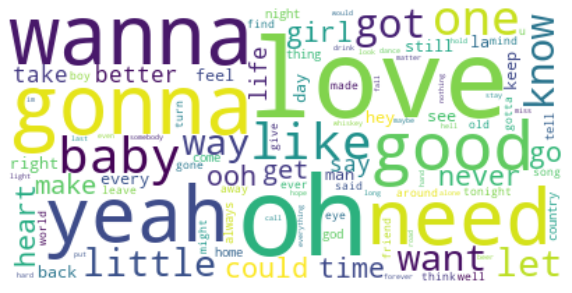

In [19]:
#COUNTRY
cty_cloud_data = dict(zip(df_cty_freq['word'].tolist(), df_cty_freq['weight'].tolist())) #dict to generate word cloud

plt.figure(figsize=(10,8))
plt.imshow(wc.generate_from_frequencies(cty_cloud_data),interpolation="bilinear")
plt.axis("off")
plt.show()
plt.savefig('cty_word_cloud.png')
plt.close()

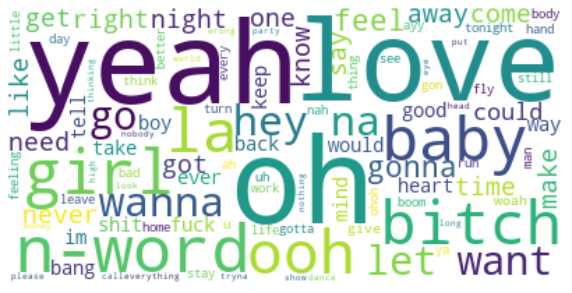

In [20]:
#R&B/HIP-HOP
rb_cloud_data = dict(zip(df_rb_freq['word'].tolist(), df_rb_freq['weight'].tolist())) #dict to generate word cloud

plt.figure(figsize=(10,8))
plt.imshow(wc.generate_from_frequencies(rb_cloud_data),interpolation="bilinear")
plt.axis("off")
plt.show()
plt.savefig('rb_word_cloud.png')
plt.close()

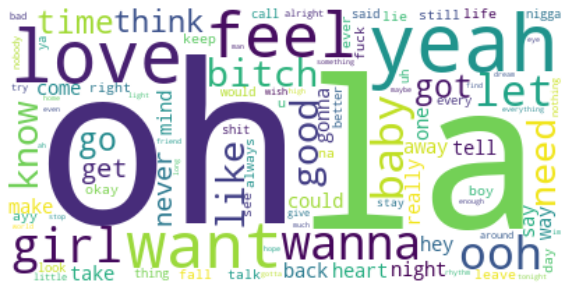

In [21]:
#ROCK/ALTERNATIVE
rock_cloud_data = dict(zip(df_rock_freq['word'].tolist(), df_rock_freq['weight'].tolist())) #dict to generate word cloud

plt.figure(figsize=(10,8))
plt.imshow(wc.generate_from_frequencies(rock_cloud_data),interpolation="bilinear")
plt.axis("off")
plt.show()
plt.savefig('rock_word_cloud.png')
plt.close()

### Generate Histograms of Top 10 Words

In [ ]:
#

In [ ]:
#plt.figure(figsize = (12, 8))
#plt.imshow(x, interpolation="bilinear")
#plt.axis("off")
#plt.show()

### Save Images to File

In [ ]:

rb_cloud_data = dict(zip(df_rb_count['word'].tolist(), df_rb_count['count'].tolist()))

#generate word cloud
plt.figure(figsize=(10,8))
wc.generate_from_frequencies(rb_cloud_data)
plt.imshow(x, interpolation="bilinear")
plt.axis("off")
#plt.savefig('my_fig.png')
plt.close()